# Импортируем библиотеки

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import f1_score, r2_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Вспомогательные функции

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score
def metrics_classification(model, y_test, pred, average=None):

    # Подсчет метрик качества модели
    recall = recall_score(y_test, pred, average=average).mean()
    precision = precision_score(y_test, pred, average=average).mean()
    f1 = f1_score(y_test, pred, average=average).mean()

    # Сохранение метрик в словарь
    metrics_dict = {
        'Model': model,
        'recall': recall,
        'precision': precision,
        'f1_score': f1
    }

    return metrics_dict

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

def split_and_normalize_data(X, y, test_size=0.2, normalization='none'):

    # Разбиение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Нормализация данных
    if normalization == 'standard':
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    elif normalization == 'minmax':
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test


In [ ]:
def find_optimal_k_for_knn(X, y, k_range, test_size=0.2, normalization='none', average=None):

    # Разбиение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = split_and_normalize_data(X, y, test_size, normalization)

    # Инициализация списка для сохранения значений MSE
    metrics = {}
    matrix = []
    y_test = y_test.to_numpy()
    # Проход по каждому значению K
    for p in range(1, 3):
      for k in range(1, k_range):
          # Создание модели KNN с текущим значением K
          knn = KNeighborsClassifier(n_neighbors=k, p=p)

          # Обучение модели на обучающем наборе данных
          knn.fit(X_train, y_train)

          # Предсказание на тестовом наборе данных
          pred = knn.predict(X_test)

          metrics[k] = [metrics_classification(knn, y_test, pred, average=average)['f1_score'], k, p]

    # Находим оптимальное значение K
      best_k = max(metrics.values())

    return best_k

# Данные

## Импортируем данные

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/lab6/dataset-tortuga.csv')
data.shape

(20000, 16)

In [ ]:
data.head()

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,28,Stormy Muto,58283940,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,NaN,beginner_front_end
1,81,Carlos Ferro,1357218,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,NaN,beginner_front_end
2,89,Robby Constantini,63212105,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,NaN,54.0,47.0,advanced_front_end
3,138,Paul Mckenny,23239851,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,NaN,71.0,89.0,beginner_data_science
4,143,Jean Webb,72234478,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,NaN,advanced_front_end


Unnamed: 0 - Бесполезный столбец

NAME - Имя ученика

USER_ID - ID ученика

HOURS_DATASCIENCE - Количество часов, потраченных на изучение курсов по DataScience

HOURS_BACKEND - Количество часов, потраченных на изучение курсов по Backend

HOURS_FRONTEND - Количество часов, потраченных на изучение курсов по Frontend

NUM_COURSES_BEGINNER_DATASCIENCE - Количество пройденных начальных курсов по DataScience

NUM_COURSES_BEGINNER_BACKEND - Количество пройденных начальных курсов по Backend

NUM_COURSES_BEGINNER_FRONTEND - Количество пройденных начальных курсов по Frontend

NUM_COURSES_ADVANCED_DATASCIENCE - Количество пройденных курсов для продвинутых по DataScience

NUM_COURSES_ADVANCED_BACKEND - Количество пройденных курсов для продвинутых по Backend

NUM_COURSES_ADVANCED_FRONTEND - Количество пройденных курсов для продвинутых по Frontend

AVG_SCORE_DATASCIENCE - Средний балл по DataScience, набранный учеником

AVG_SCORE_BACKEND - Средний балл по Backend, набранный учеником

AVG_SCORE_FRONTEND - Средний балл по Frontend, набранный учеником

PROFILE - Технический профиль студента (кто он по итогу)

## Предобработка

In [ ]:
data.drop(columns=['USER_ID', 'Unnamed: 0', 'NAME'], axis=1, inplace=True)

In [ ]:
data.head()

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,NaN,beginner_front_end
1,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,NaN,beginner_front_end
2,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,NaN,54.0,47.0,advanced_front_end
3,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,NaN,71.0,89.0,beginner_data_science
4,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,NaN,advanced_front_end


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HOURS_DATASCIENCE                 19986 non-null  float64
 1   HOURS_BACKEND                     19947 non-null  float64
 2   HOURS_FRONTEND                    19984 non-null  float64
 3   NUM_COURSES_BEGINNER_DATASCIENCE  19974 non-null  float64
 4   NUM_COURSES_BEGINNER_BACKEND      19982 non-null  float64
 5   NUM_COURSES_BEGINNER_FRONTEND     19961 non-null  float64
 6   NUM_COURSES_ADVANCED_DATASCIENCE  19998 non-null  float64
 7   NUM_COURSES_ADVANCED_BACKEND      19992 non-null  float64
 8   NUM_COURSES_ADVANCED_FRONTEND     19963 non-null  float64
 9   AVG_SCORE_DATASCIENCE             19780 non-null  float64
 10  AVG_SCORE_BACKEND                 19916 non-null  float64
 11  AVG_SCORE_FRONTEND                19832 non-null  float64
 12  PROF

In [ ]:
data = data.fillna(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HOURS_DATASCIENCE                 20000 non-null  float64
 1   HOURS_BACKEND                     20000 non-null  float64
 2   HOURS_FRONTEND                    20000 non-null  float64
 3   NUM_COURSES_BEGINNER_DATASCIENCE  20000 non-null  float64
 4   NUM_COURSES_BEGINNER_BACKEND      20000 non-null  float64
 5   NUM_COURSES_BEGINNER_FRONTEND     20000 non-null  float64
 6   NUM_COURSES_ADVANCED_DATASCIENCE  20000 non-null  float64
 7   NUM_COURSES_ADVANCED_BACKEND      20000 non-null  float64
 8   NUM_COURSES_ADVANCED_FRONTEND     20000 non-null  float64
 9   AVG_SCORE_DATASCIENCE             20000 non-null  float64
 10  AVG_SCORE_BACKEND                 20000 non-null  float64
 11  AVG_SCORE_FRONTEND                20000 non-null  float64
 12  PROF

In [ ]:
data['PROFILE'] = data['PROFILE'].factorize()[0]

In [ ]:
data.corr()

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
HOURS_DATASCIENCE,1.000000,0.021870,-0.088862,0.136035,0.123805,0.000501,0.058655,0.073436,-0.107727,-0.250933,-0.219430,-0.003006,-0.068879
HOURS_BACKEND,0.021870,1.000000,-0.034013,0.265100,-0.043416,-0.087625,0.112169,0.023768,0.051761,0.018688,-0.006947,-0.005022,0.242027
HOURS_FRONTEND,-0.088862,-0.034013,1.000000,-0.127689,-0.074328,-0.028419,0.057144,-0.032416,-0.053068,-0.146801,0.056139,0.038644,-0.185539
NUM_COURSES_BEGINNER_DATASCIENCE,0.136035,0.265100,-0.127689,1.000000,-0.052494,0.238287,0.075016,-0.132878,0.130985,0.073693,0.018625,0.153553,0.380326
NUM_COURSES_BEGINNER_BACKEND,0.123805,-0.043416,-0.074328,-0.052494,1.000000,-0.100133,-0.032616,0.057885,-0.153500,0.031328,0.067914,-0.170368,-0.369018
NUM_COURSES_BEGINNER_FRONTEND,0.000501,-0.087625,-0.028419,0.238287,-0.100133,1.000000,-0.073680,-0.166330,0.135294,-0.071893,0.040680,0.121410,0.275555
NUM_COURSES_ADVANCED_DATASCIENCE,0.058655,0.112169,0.057144,0.075016,-0.032616,-0.073680,1.000000,-0.091428,0.133359,0.129647,0.086622,0.107133,0.213320
NUM_COURSES_ADVANCED_BACKEND,0.073436,0.023768,-0.032416,-0.132878,0.057885,-0.166330,-0.091428,1.000000,-0.141684,-0.016102,-0.153963,-0.124744,-0.164062
NUM_COURSES_ADVANCED_FRONTEND,-0.107727,0.051761,-0.053068,0.130985,-0.153500,0.135294,0.133359,-0.141684,1.000000,0.102820,0.168652,0.162432,0.239661
AVG_SCORE_DATASCIENCE,-0.250933,0.018688,-0.146801,0.073693,0.031328,-0.071893,0.129647,-0.016102,0.102820,1.000000,0.079446,0.058316,0.056885


## Выбираем данные для модели

In [ ]:
X = data.drop(columns=['PROFILE'])
y = data['PROFILE']

In [ ]:
y.unique()

array([0, 1, 2, 3, 4, 5])

In [ ]:
y.value_counts()

PROFILE
5    3339
1    3337
0    3335
3    3332
4    3330
2    3327
Name: count, dtype: int64

<Axes: xlabel='PROFILE'>

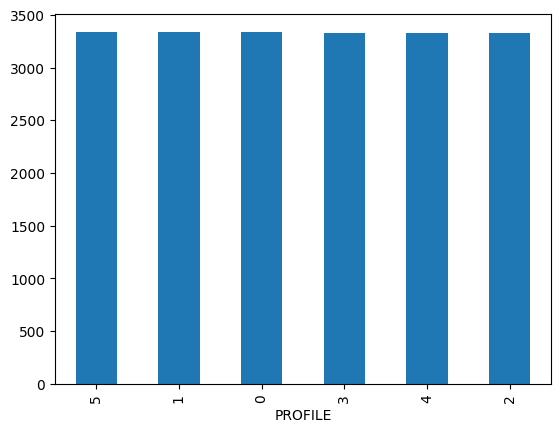

In [ ]:
y.value_counts().plot(kind='bar')

# Строим модель

## Обычный KNN

In [ ]:
X_train, X_test, y_train, y_test = split_and_normalize_data(X, y, test_size=0.2, normalization='standard')

In [ ]:
best_k = find_optimal_k_for_knn(X, y, k_range=15, test_size=0.2, normalization='standard', average=None)
best_k

[0.9333070813367675, 12, 2]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
metrics = metrics_classification(knn, y_test, pred, average=None)
metrics

{'Model': KNeighborsClassifier(n_neighbors=12),
 'recall': 0.933506261637523,
 'precision': 0.9334827580505993,
 'f1_score': 0.9333070813367675}

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       654
           1       0.94      0.94      0.94       681
           2       0.93      0.95      0.94       651
           3       0.92      0.93      0.92       655
           4       0.93      0.91      0.92       710
           5       0.95      0.91      0.93       649

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000



## Взвешенный KNN

In [ ]:
X_train, X_test, y_train, y_test = split_and_normalize_data(X, y, test_size=0.2, normalization='standard')

In [ ]:
best_k = find_optimal_k_for_knn(X, y, k_range=15, test_size=0.2, normalization='standard', average='weighted')
best_k

[0.933186081363082, 12, 2]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
metrics = metrics_classification(knn, y_test, pred, average='weighted')
metrics

{'Model': KNeighborsClassifier(n_neighbors=12),
 'recall': 0.93325,
 'precision': 0.9334917314183913,
 'f1_score': 0.933186081363082}

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       654
           1       0.94      0.94      0.94       681
           2       0.93      0.95      0.94       651
           3       0.92      0.93      0.92       655
           4       0.93      0.91      0.92       710
           5       0.95      0.91      0.93       649

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000



# Сохранение модели

In [272]:
import pickle

In [274]:
with open('/content/drive/MyDrive/Colab Notebooks/ML/lab6/model.pkl', 'wb') as f:
  pickle.dump(knn, f)

# Открытие модели

In [275]:
with open('/content/drive/MyDrive/Colab Notebooks/ML/lab6/model.pkl', 'rb') as f:
  knn2 = pickle.load(f)

In [276]:
pred = knn2.predict(X_test)

In [277]:
print('predicted:', pred[:5])
print('true:', y_test[:5])

predicted: [4 4 1 0 0]
true: 10650    4
2041     4
8668     2
1114     0
13902    0
Name: PROFILE, dtype: int64


In [278]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       654
           1       0.94      0.94      0.94       681
           2       0.93      0.95      0.94       651
           3       0.92      0.93      0.92       655
           4       0.93      0.91      0.92       710
           5       0.95      0.91      0.93       649

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000

